In [ ]:
from google.colab import files
files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d adityajn105/flickr8k
!unzip flickr8k.zip -d ./data


Streaming output truncated to the last 5000 lines.
  inflating: ./data/Images/2844846111_8c1cbfc75d.jpg  
  inflating: ./data/Images/2844963839_ff09cdb81f.jpg  
  inflating: ./data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: ./data/Images/2845691057_d4ab89d889.jpg  
  inflating: ./data/Images/2845845721_d0bc113ff7.jpg  
  inflating: ./data/Images/2846037553_1a1de50709.jpg  
  inflating: ./data/Images/2846785268_904c5fcf9f.jpg  
  inflating: ./data/Images/2846843520_b0e6211478.jpg  
  inflating: ./data/Images/2847514745_9a35493023.jpg  
  inflating: ./data/Images/2847615962_c330bded6e.jpg  
  inflating: ./data/Images/2847859796_4d9cb0d31f.jpg  
  inflating: ./data/Images/2848266893_9693c66275.jpg  
  inflating: ./data/Images/2848571082_26454cb981.jpg  
  inflating: ./data/Images/2848895544_6d06210e9d.jpg  
  inflating: ./data/Images/2848977044_446a31d86e.jpg  
  inflating: ./data/Images/2849194983_2968c72832.jpg  
  inflating: ./data/Images/2850719435_221f15e951.jpg  
  inflating: .

In [ ]:
import zipfile
import os

# Correct path to the zip file
zip_path = r"/content/flickr8k.zip"
extract_path = './data/flickr8k/'





In [ ]:
# Extract zip file
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted.")

Dataset extracted successfully!


In [ ]:
import os

if os.path.exists(zip_path):
    print("File found!")
else:
    print("File NOT found. Check path.")


File found!


In [ ]:
import os
import random
from shutil import copyfile

# Path to original dataset (fix the path here)
dataset_path = './data/flickr8k/Images'
small_dataset_path = './data/small_flickr8k'

# Create folder for small dataset
os.makedirs(small_dataset_path, exist_ok=True)

# Select 500 random images
all_images = os.listdir(dataset_path)
selected_images = random.sample(all_images, 500)

for img in selected_images:
    copyfile(
        os.path.join(dataset_path, img),
        os.path.join(small_dataset_path, img)
    )

print(f"Selected {len(selected_images)} images for training.")


Selected 500 images for training.


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess images
def load_images(img_folder):
    images = []
    for img_file in os.listdir(img_folder):
        img = load_img(os.path.join(img_folder, img_file), target_size=(224, 224))
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

# Load small dataset
X = load_images(small_dataset_path)
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (500, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape

# CNN Model
input_layer = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Reshape for RNN
x = Reshape((1, -1))(x)  # Shape: (batch_size, 1, features)

# RNN Model
x = LSTM(128)(x)
output_layer = Dense(500, activation='softmax')(x)  # Example output size

# Final Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 186624)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    95,617,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │        64,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,701,428 (365.07 MB)

 Trainable params: 95,701,428 (365.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras import Input
from tensorflow.keras.models import Model


# Assume a maximum caption length (you might need to adjust this)
max_length = 25

# Assume a vocabulary size (you might need to adjust this)
vocab_size = 10000

caption_input = Input(shape=(max_length,))
embedding = Embedding(input_dim=vocab_size, output_dim=256)(caption_input)
x = LSTM(256)(embedding)
output = Dense(vocab_size, activation='softmax')(x)

caption_model = Model(inputs=caption_input, outputs=output)
caption_model.compile(optimizer='adam', loss='categorical_crossentropy')
caption_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 25, 256)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10000)          │     2,570,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,655,312 (21.57 MB)

 Trainable params: 5,655,312 (21.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y = np.random.randint(0, 500, size=(X.shape[0],))  # Dummy labels for testing

# One-hot encoding of labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=500)

model.fit(X, y, epochs=5, batch_size=32)
loss = model.evaluate(X, y)
print(f"Loss: {loss}")



Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - loss: 6.2689
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - loss: 6.0432
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - loss: 5.9214
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - loss: 5.8217
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - loss: 5.7527
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 774ms/step - loss: 5.7539
Loss: 5.739856719970703


In [ ]:
model.save('./cnn_rnn_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
!ls ./data/small_flickr8k


1032122270_ea6f0beedb.jpg  264141937_585320617a.jpg   3351667846_ac43118ae5.jpg
1087168168_70280d024a.jpg  2642688531_8fb68b2147.jpg  3353950389_1153d5e452.jpg
1088767354_2acee738cf.jpg  2644326817_8f45080b87.jpg  3356369156_074750c6cc.jpg
1093716555_801aacef79.jpg  2644430445_47c985a2ee.jpg  3356494271_6103d0b556.jpg
1095590286_c654f7e5a9.jpg  265223847_636ba039c1.jpg   3362592729_893e26b806.jpg
1096097967_ac305887b4.jpg  2666205903_8d287669e1.jpg  336460583_6c8ccb7188.jpg
109823397_e35154645f.jpg   2695085448_a11833df95.jpg  3372215826_b3e6403b2e.jpg
110595925_f3395c8bd6.jpg   2705793985_007cc703fb.jpg  3377570617_d2f2225a74.jpg
113678030_87a6a6e42e.jpg   2730994020_64ac1d18be.jpg  3380364224_2626d9d354.jpg
1138784872_69ade3f2ab.jpg  2748435417_ea7bbcc17c.jpg  3381584882_341ee3092f.jpg
1143373711_2e90b7b799.jpg  2749124446_d4432787b5.jpg  3381788544_2c50e139dd.jpg
1159574340_99ba8c3c59.jpg  2753531542_ace2c870b7.jpg  3385593926_d3e9c21170.jpg
1167908324_8caab45e15.jpg  2754271176_4a2

In [ ]:
captions_path = './data/flickr8k/captions.txt'
if os.path.exists(captions_path):
    print(f"Captions file found at: {captions_path}")
else:
    print("Captions file NOT found! Check the path.")


Captions file found at: ./data/flickr8k/captions.txt


In [ ]:
try:
    with open(captions_path, 'r') as f:
        data = f.readlines()
        print(f"Read {len(data)} lines from captions file.")
except Exception as e:
    print(f"Error reading captions file: {e}")


Read 40456 lines from captions file.


Loaded 8091 images with captions.
Sample Image: 1000268201_693b08cb0e.jpg
Sample Captions: ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A girl going into a wooden building .', 'A little girl climbing into a wooden playhouse .', 'A little girl climbing the stairs to her playhouse .', 'A little girl in a pink dress going into a wooden cabin .']


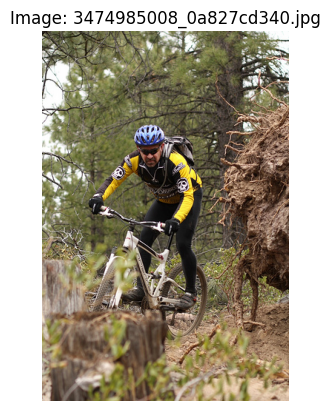

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Select a random image from the dataset
sample_key = random.choice(list(captions.keys()))
sample_img_path = f"./data/flickr8k/Images/{sample_key}"

# Display the image
img = mpimg.imread(sample_img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Image: {sample_key}")
plt.show()


In [ ]:
# Display captions for the selected image
if sample_key in captions:
    print(f"Captions for '{sample_key}':\n")
    for i, caption in enumerate(captions[sample_key], 1):
        print(f"{i}. {caption}")
else:
    print("No captions found for this image.")


Captions for '3474985008_0a827cd340.jpg':

1. A man in a blue helmet and sunglasses bikes through wooded terrain
2. A man in a blue helmet rides a mountain bike .
3. A man rides his bicycle through some grass in a wooded area .
4. A man with a blue helmet and a yellow and black jacket is riding a bike in the woods .
5. A mountain biker riding through the woods .
